# Hierarchical Clustering
**Learning Objectives:**

- Describe how the Hierarchical clustering algorithm works and apply it to a dataset.
- Define and visualize dendrograms.
---

# Hierarchical Clustering

Hierarchical Clustering is another way to cluster our data into different groups.

There are two types of Hierarchical Clustering algorithms:

1. **Divisive Clustering:** We can call this the "top-down" approach. Here, we start with all of our data in one cluster. From there, we split the data into more and more clusters based on similar traits.
2. **Agglomerative Clustering:** You can think of this as the "bottom-up" approach. We start with each data point in its own cluster. From there, we group clusters together until we eventually have only one cluster.

In both of these algorithms, we have to choose how many clusters we want to ultimately end up with. We can visualize what we might think is an optimal number of clusters using a tree-like diagram called a **dendrogram**.

1. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

3. Load Dataset.

In [2]:
wine = pd.read_csv('https://s3.us-east-1.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/1613254703__modified_wine.csv')

df = wine[['malic_acid', 'flavanoids']]

df.head()

,malic_acid,flavanoids
0,1.71,3.06
1,1.78,2.76
2,2.36,3.24
3,1.95,3.49
4,1.76,3.39


Remember that there is no target/y-vector in this dataset! We are interested in finding clusters.

4. Scale Data.

In [3]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & Transform data
scaled_df = scaler.fit_transform(df)

5. Visualize Dendrogram.

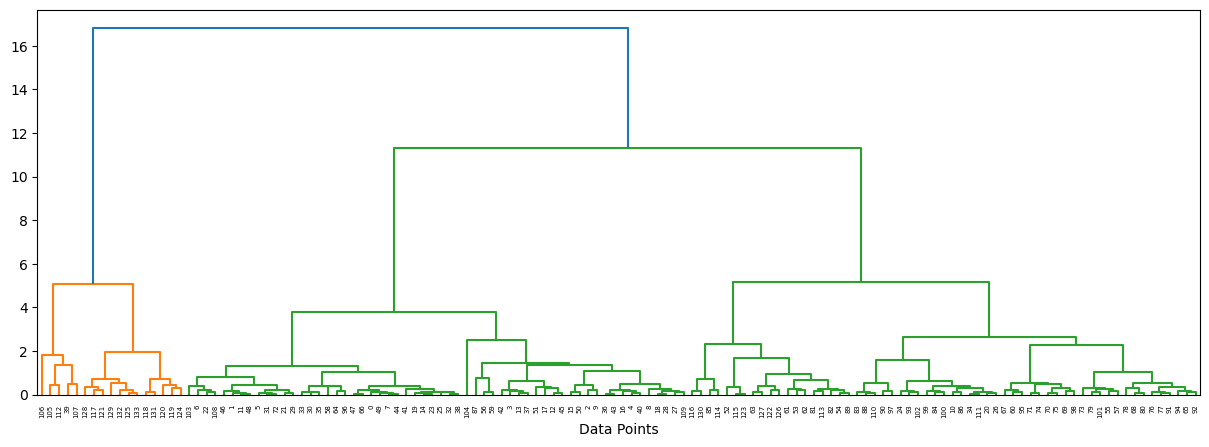

In [4]:
# Visualize Dendrogram
plt.figure(figsize=(15,5))
sch.dendrogram(sch.linkage(scaled_df, method='ward'))
plt.xlabel('Data Points');

# Choosing Clusters
One way to choose the number of clusters that an agglomerative clustering algorithm stops at is to examine this dendrogram.

We can use the below dendrogram to determine the optimal number of clusters. To do this we examine the dendrogram and find the place where the vertical lines are, on average, the longest and draw a horizontal line at that place. The number of vertical lines that it intersects is might be a good number of clusters. In the above dendrogram, it appears that the longest lines, on average, are between 6 and 11 on the y axis. We could draw our line at 8 and have the algorithm stop at 3 clusters.

**More examples:**

In the below dendrogram we find the vertical lines are longest at 2 clusters. This is where the clusters have the greatest average distance from each other.

[![imagealttext](https://lh6.googleusercontent.com/L_vZi_9E_r1N2w9ie_ta24bD7I_d-BKAZeVDTbu7AP8ESVEEFTMF5LBtsn7R-SZtjbLhXtHPnconTdIzUgSntbcKZgWNnEA0Dsscr-tYPKw49Zk1i8L0F_Gs-YLJDCWVRIye9ahq)]

In the following dendrogram we might, instead, draw the horizontal line where it intersects four long vertical lines. This suggests that we should have the agglomerative clustering algorithm stop at four clusters. These clusters will have the farthest average distance from each other.

[![imagealttext](https://lh3.googleusercontent.com/0Anu0l-0K85N3Rvwr6ZsgHCZp_oNW5JkpfWs9N8PGwizSOaXlr41oEVSmVo20Mu9-X66XjwyA4_hii441WQnWykRBM_PgGBlew8Yj6dXv0vA7oVK1F2vauUMy9VegBvJID2TCzHp)]

Where would you put your horizontal line on this dendrogram?

[![image](https://lh5.googleusercontent.com/H0czbwl_TVpqP3RWwHHx8V6iOWQd7RbFNO1T2GB1k9Ot7RgghCOrdKEiJkx8mXYlZo5G1Poz6Wz37a48qPUunSSDUv4-kJ3lN4QV4jDGitAXNgmXf5lm1dzTnl2nMypjZj7wGwzS)]

# Hierarchical Clustering in Python

In [5]:
# Instantiate clustering 
hc = AgglomerativeClustering(n_clusters=2)
hc.fit(scaled_df)

AgglomerativeClustering()

/tmp/ipykernel_10741/2162862102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = hc.labels_


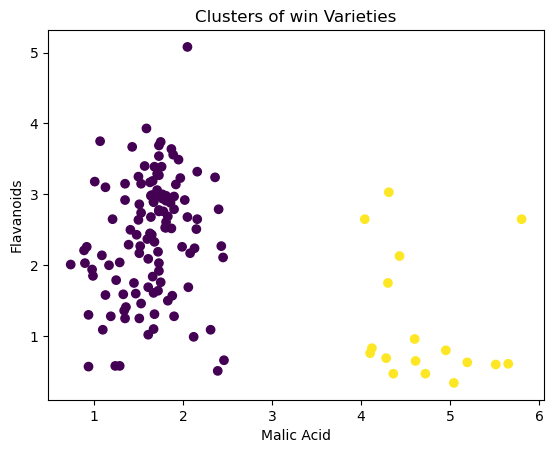

In [6]:
# Save the cluster labels to the dataframe
df['cluster'] = hc.labels_
# Visualize the clusters
plt.scatter(df['malic_acid'], df['flavanoids'], c = df['cluster'])
plt.xlabel('Malic Acid')
plt.ylabel('Flavanoids')
plt.title('Clusters of win Varieties');

/tmp/ipykernel_10741/2761234930.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = hc.labels_


Text(0.5, 1.0, 'Clusters of Wine Varieties')

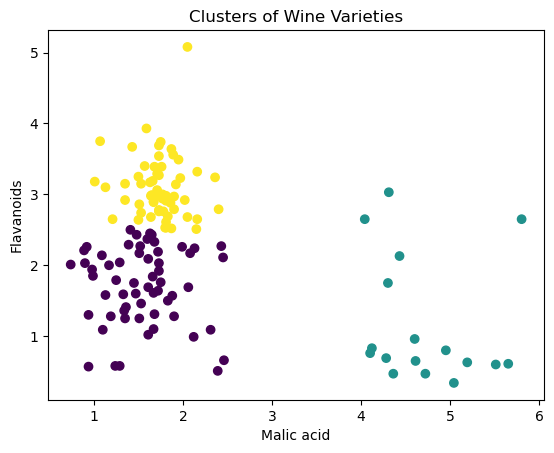

In [7]:
# Try the same thing with 3 clusters
hc = AgglomerativeClustering(n_clusters=3)
hc.fit(scaled_df)
# Save the cluster labels to the dataframe
df['cluster'] = hc.labels_
# Visualize the cluster
plt.scatter(df['malic_acid'], df['flavanoids'], c=df['cluster'])
plt.xlabel('Malic acid')
plt.ylabel('Flavanoids')
plt.title('Clusters of Wine Varieties')